In [84]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import warnings
import copy
import random
import os
import cv2
from PIL import Image
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.optimizers import Adam
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split


In [85]:
class CNN:
	@staticmethod
	def build(width, height, depth, classes):
		model = models.Sequential()
		inputShape = (height, width, depth)
		model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=inputShape))
		model.add(layers.MaxPooling2D(2,2))
		model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
		model.add(layers.MaxPooling2D(2,2))
		model.add(layers.Flatten())
		model.add(layers.Dense(128, activation = 'relu'))
		model.add(layers.Dense(classes, activation = 'softmax'))
		return model

In [86]:
def train_cnn(train_images, train_labels, val_images = np.array([]),val_labels = np.array([]),epochs = 5):
    model = CNN.build(width=30, height=30, depth=3, classes=43)
    model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #98.97 - adam 99.23 - rmsprop
    if val_images.size!=0 and val_labels.size!=0:
        model.fit(train_images, train_labels, epochs = epochs, batch_size = 128 ,validation_data=(val_images, val_labels)) 
    else:
        model.fit(train_images, train_labels, epochs = epochs, batch_size = 128) 
    return model

In [87]:
def evalute_cnn(model, test_images, test_labels):
    test_loss, test_acc  = model.evaluate(test_images, test_labels)
    print(f'[INFO] Loss:{test_loss:.4f} Test accuracy: {(test_acc*100):.4f}')

In [88]:
def calculate_f1_score(model, test_images,test_labels):
    test_prob = model.predict(test_images) 
    test_pred = test_prob.argmax(axis=-1)
    f1 = f1_score(test_labels, test_pred, average='weighted')
    print(f'[INFO] F1-Score is:{f1:.4f}')
    return f1

In [89]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join('../GTSRB/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [90]:
print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# y_train = to_categorical(y_train, 43)
# y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [91]:
train_images,train_labels,test_images,test_labels = X_train, y_train, X_test, y_test

In [92]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
# test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_images , test_images = train_images / 255.0 , test_images / 255.0
print(train_images.shape, train_labels.shape,test_images.shape, test_labels.shape)
model = train_cnn(train_images,train_labels,test_images,test_labels)
# model = train_cnn(train_images,train_labels)
evalute_cnn(model,test_images,test_labels)
calculate_f1_score(model,test_images,test_labels)

(31367, 30, 30, 3) (31367,) (7842, 30, 30, 3) (7842,)
Epoch 1/5
246/246 [==============================] - 8s 27ms/step - loss: 1.9471 - accuracy: 0.4832 - val_loss: 1.1338 - val_accuracy: 0.6584
Epoch 2/5
246/246 [==============================] - 5s 21ms/step - loss: 0.5483 - accuracy: 0.8473 - val_loss: 0.3592 - val_accuracy: 0.8996
Epoch 3/5
246/246 [==============================] - 5s 20ms/step - loss: 0.2496 - accuracy: 0.9346 - val_loss: 0.1679 - val_accuracy: 0.9583
Epoch 4/5
246/246 [==============================] - 5s 20ms/step - loss: 0.1489 - accuracy: 0.9616 - val_loss: 0.4938 - val_accuracy: 0.8911
Epoch 5/5
246/246 [==============================] - 1s 4ms/step - loss: 0.0965 - accuracy: 0.9765
[INFO] Loss:0.0965 Test accuracy: 97.6537
246/246 [==============================] - 1s 3ms/step
[INFO] F1-Score is:0.9765


0.9764873525396593

In [93]:
def crossover(c1, c2, min_width=1, h_lower_bound=2, h_upper_bound=10):
    height, width, depth = c1.shape
    start_h = np.random.randint(1, height // 2 + 1)
    end_h = np.random.randint(start_h + h_lower_bound, min(start_h + h_upper_bound, height))
    start_w = np.random.randint(0, width - min_width)
    end_w = np.random.randint(start_w + min_width, width)
    c1_sliced = c1.copy()
    c2_sliced = c2.copy()
    c1_sliced[start_h:end_h, start_w:end_w, :] = c2[start_h:end_h, start_w:end_w, :]
    c2_sliced[start_h:end_h, start_w:end_w, :] = c1[start_h:end_h, start_w:end_w, :]
    return c1_sliced, c2_sliced

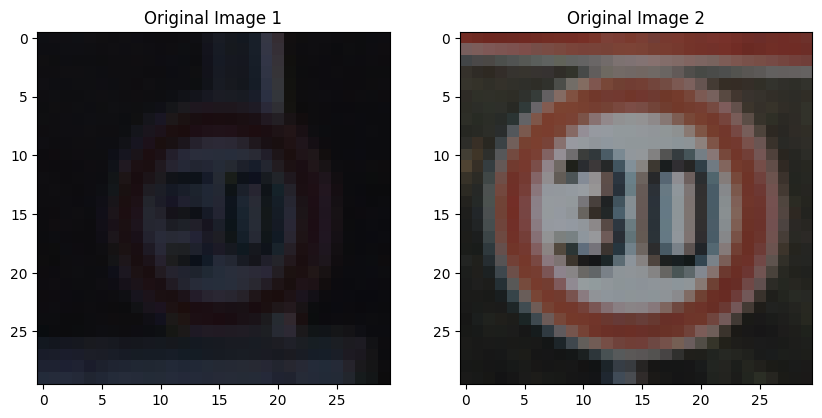

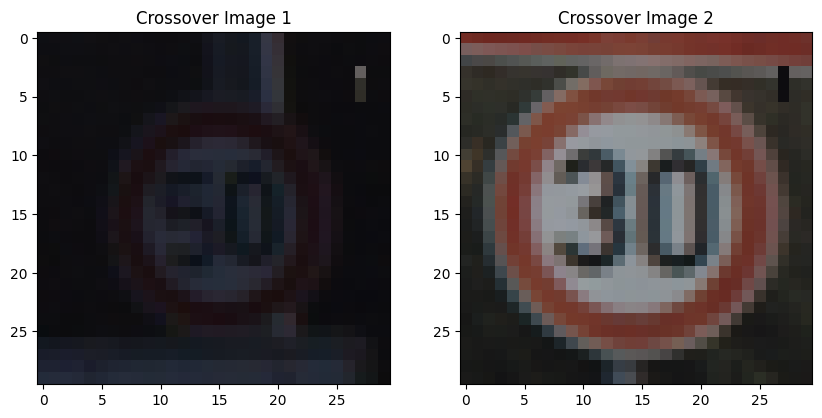

In [94]:
org1 = train_images[np.random.randint(0, len(train_images))]
org2 = train_images[np.random.randint(0, len(train_images))]
c1_crossover, c2_crossover = crossover(org1,org2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(org1.squeeze(), cmap='gray')
plt.title('Original Image 1')
plt.subplot(1, 2, 2)
plt.imshow(org2.squeeze(), cmap='gray')
plt.title('Original Image 2')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(c1_crossover.squeeze(), cmap='gray')
plt.title('Crossover Image 1')
plt.subplot(1, 2, 2)
plt.imshow(c2_crossover.squeeze(), cmap='gray')
plt.title('Crossover Image 2')
plt.show()

In [95]:
def mutation(m, d=5):
    mutated_image =m.copy()
    step = np.random.randint(-d, d+1)/255.
    mask = np.random.choice([True, False], size=mutated_image.shape)
    mutated_image[mask] += step
    return mutated_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


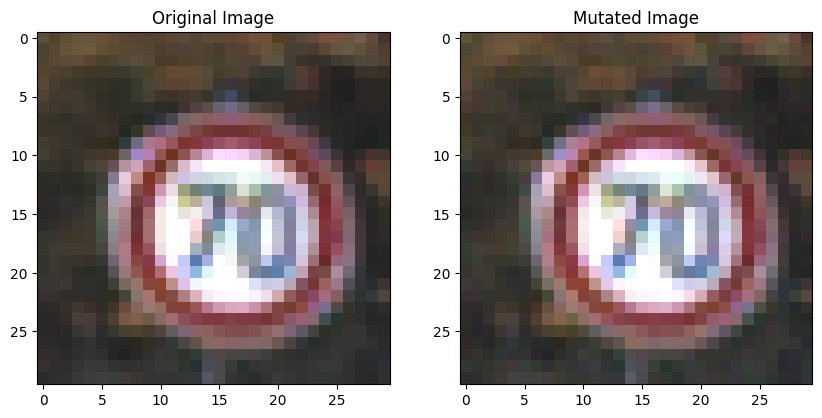

In [96]:
image = train_images[np.random.randint(0, len(train_images))]
mutated_image = mutation(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(mutated_image.squeeze(), cmap='gray')
plt.title('Mutated Image')
plt.show()

In [97]:
def anneal(alpha, mask_a, d=2, lower_bound=2, upper_bound=10):
    alpha = alpha.copy()
    mask_b = np.random.choice([True, False], size=alpha.shape)
    mask = mask_a ^ mask_b
    step = np.random.randint(-d, d+1, size=alpha.shape)/225.
    start_h = np.random.randint(0, lower_bound)
    end_h = np.random.randint(alpha.shape[0] - upper_bound, alpha.shape[0])
    start_w = np.random.randint(0, lower_bound)
    end_w = np.random.randint(alpha.shape[1] - upper_bound, alpha.shape[1])
    masksliced = np.zeros(alpha.shape, dtype=bool)
    masksliced[start_h:end_h, start_w:end_w] = mask[start_h:end_h, start_w:end_w]
    # print(masksliced.shape)
    # print(alpha.shape)
    alpha[masksliced] += step[masksliced]
    return alpha

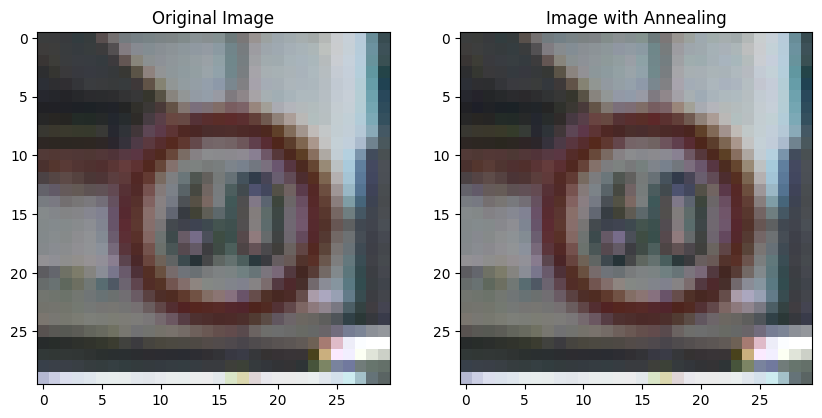

In [98]:
image = train_images[np.random.randint(0, len(train_images))]
mask_a = np.random.choice([True, False], size=image.shape)
anneal_image = anneal(image,mask_a)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(anneal_image.squeeze(), cmap='gray')
plt.title('Image with Annealing')
plt.show()

In [99]:
def calculate_recall(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # print(y_test,y_pred_classes)
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    # print(recall)
    return recall

In [100]:
def fitness(X, Y, alpha_population, model, lambda_value = 0.1):
    fitness_values = []
    for alpha,alpha_label in alpha_population:
        # print(alpha.shape)
        # print(alpha_label.shape)      
        # X_fitness = np.concatenate([X, alpha], axis=0)
        # Y_fitness = np.concatenate([Y, alpha_label], axis=0)
        # error = lambda_value * calculate_recall(model,X_fitness,Y_fitness)
        error = lambda_value * calculate_recall(model,alpha,alpha_label)
        alpha_fitness = 1 + error - np.linalg.norm(alpha)
        # print(error,np.linalg.norm(alpha),alpha_fitness)
        fitness_values.append(abs(np.max(alpha_fitness)))
    # best_index = np.argmax(fitness_values)
    # print(best_index)
    return fitness_values #if needed put this too alpha_population[best_index]

In [101]:
X_sample = train_images[:4]
y_sample = train_labels[:4]
# print(X_sample.shape)
# print(y_sample.shape)
alpha_population_sample  = [(np.expand_dims(x, axis=0),np.array([y])) for x,y in zip(X_sample, y_sample)]
# alpha_population_sample = [(np.random.rand(1,28, 28, 1), np.random.randint(0, 5, size=(1,))) for _ in range(3)]
# print(alpha_population_sample)
fitness_values = fitness(X_sample, y_sample, alpha_population_sample, model)
print("Fitness values for the sample alpha population:")
print(fitness_values)

1/1 [==============================] - 0s 34ms/step
Fitness values for the sample alpha population:
[20.59585825180888, 3.643162787989865, 29.754341233179595, 15.754928877066797]


In [102]:
def selection(parents, z=0.5):
    fitness_values = fitness(train_images, train_labels, parents, model)
    num_parents = len(parents)
    num_offspring = int(num_parents * z)
    selected_indices = np.random.choice(num_parents, num_offspring, replace=False, p= fitness_values / np.sum(fitness_values))
    offspring = [parents[i] for i in selected_indices]
    parents_next_gen = [parents[i] for i in range(num_parents) if i not in selected_indices]
    return parents_next_gen, offspring

In [103]:
# X_sample = train_images[:5]
# y_sample = train_labels[:5]
# model = train_cnn(X_sample, y_sample)
# maxpayoff = 0
# exitloop = False
# population = [(np.expand_dims(x, axis=0),np.array([y])) for x,y in zip(X_sample, y_sample)]
# # print(population)
# F_Xtrain = fitness(X_sample, y_sample, population,model)
# print(F_Xtrain)
# gen = 0

# best_index = np.argmax(F_Xtrain)
# print(best_index)
# acurr, currpayoff = population[best_index], F_Xtrain[best_index]  # what is the max show with the fitness example and what is this acurr
# # print(acurr[0],acurr[1])
# print(currpayoff)
# X_sample = np.concatenate([X_sample, acurr[0]], axis=0)
# y_sample = np.concatenate([y_sample, acurr[1]], axis=0)
# model = train_cnn(X_sample, y_sample) 

In [104]:
def twoplayergame_ga(Xtrain, Ytrain, maxiter=100):
    model = train_cnn(Xtrain, Ytrain)
    exitloop = False
    population = [(np.expand_dims(x, axis=0),np.array([y])) for x,y in zip(Xtrain, Ytrain)]
    F_Xtrain = fitness(Xtrain, Ytrain, population, model)
    maxpayoff = np.max(F_Xtrain)
    gen = 0
    while gen < maxiter and not exitloop:
        best_index = np.argmax(F_Xtrain)
        # print(F_Xtrain)
        acurr, currpayoff = population[best_index], F_Xtrain[best_index]
        Xcurr = np.concatenate([Xtrain, acurr[0]], axis=0)
        Ycurr = np.concatenate([Ytrain, acurr[1]], axis=0)
        model = train_cnn(Xcurr, Ycurr, epochs = 1) 
        print("The currpayoff is :", currpayoff)
        if abs(currpayoff - maxpayoff) < 0.1: # the currpayoff issue is coming
            maxpayoff = currpayoff
            parents, offspring = selection(population, 0.5)
            
            new_offspring = []
            for i in range(0,len(offspring)-1,2):
                child1, child2 = crossover(np.squeeze(offspring[i][0], axis=0), np.squeeze(offspring[i+1][0], axis=0))
                new_offspring.append((child1,offspring[i][1]))
                new_offspring.append((child2,offspring[i+1][1]))

            curr_offspring = []
            for mutant,label in new_offspring:
                curr_offspring.append((np.expand_dims(mutation(mutant), axis=0),label))
            
            curr_population = parents + curr_offspring
            population = curr_population.copy()
            F_Xtrain = fitness(Xtrain, Ytrain, population, model)
        else:
            exitloop = True
        
        gen += 1

    final_index = np.argmax(F_Xtrain)
    acurr, maxpayoff = population[final_index], F_Xtrain[final_index]
    return acurr

Epoch 1/5
1/1 [==============================] - 1s 535ms/step - loss: 3.7057 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 2.5438 - accuracy: 0.2000
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 1.5751 - accuracy: 0.6000
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 1.9284 - accuracy: 0.4000
Epoch 5/5
1/1 [==============================] - 1s 629ms/step - loss: 3.8212 - accuracy: 0.1667
The currpayoff is : 31.676398522125695
1/1 [==============================] - 1s 518ms/step - loss: 3.8890 - accuracy: 0.0000e+00
The currpayoff is : 31.576398522125693
[26]


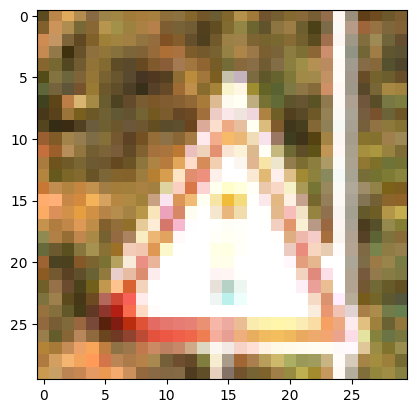

In [105]:
warnings.filterwarnings('ignore')
X_sample = train_images[:5]
y_sample = train_labels[:5]
acurr = twoplayergame_ga(X_sample, y_sample)
print(acurr[1])
plt.imshow(acurr[0].squeeze(), cmap='gray')

In [106]:
def twoplayergame_sa(Xtrain,Ytrain): 
    model = train_cnn(Xtrain,Ytrain)
    maxpayoff = 0
    exitloop = False
    Tmax = 10
    Tmin = 5
    v = 5 # this should be 50
    p = 0.6
    mask = np.random.choice([True,False], size=Xtrain[0].shape)
    Tcurr = Tmax 
    population = [(np.expand_dims(x, axis=0),np.array([y])) for x,y in zip(Xtrain, Ytrain)]
    random.shuffle(population)
    pop_size = len(population) // 3
    ac = population[:pop_size].copy()
    ag = population[pop_size:2*pop_size].copy()
    an = population[2*pop_size:].copy()  
    evalc = fitness(Xtrain,Ytrain, ac, model)
    maxpayoff = max(fitness(Xtrain,Ytrain, ag, model))
    while not exitloop:
        evalg = fitness(Xtrain,Ytrain, ag,model)
        curr_index = np.argmax(evalg)
        currpayoff = evalg[curr_index]
        print("The current Payoff is:",currpayoff)
        if abs(currpayoff - maxpayoff) < 0.1:
            maxpayoff = currpayoff
            while Tcurr >= Tmin:
                i = 1
                while i <= v:
                    temp = []
                    for ele,label in ac:
                        temp.append((np.expand_dims(anneal(np.squeeze(ele, axis=0),mask),axis = 0),label))
                    an = temp.copy()
                    evaln = fitness(Xtrain,Ytrain, an,model)    
                    print(max(evaln),max(evalc),max(evalg))
                    if max(evaln) > max(evalc):
                        ac = an.copy()
                        evalc = evaln.copy()
                        if max(evalg) < max(evaln):
                            ag = an.copy()
                            evalg = evaln.copy()
                    else:
                        if np.random.random() <= np.exp((max(evaln) - max(evalc)) / Tcurr):
                            ac = an.copy()
                            evalc = evaln.copy()
                    i += 1
                Tcurr *= p
            ag = ac.copy()
        else:
            exitloop = True
    return ag[np.argmax(fitness(Xtrain,Ytrain, ag, model))]
 


In [107]:
# X_sample = train_images[:10]
# y_sample = train_labels[:10]
# ag = twoplayergame_sa(X_sample, y_sample)
# # print(ag)
# print(ag[1])
# plt.imshow(ag[0].squeeze(), cmap='gray')

In [108]:
def generate_manipulated_data(images,labels, A_s):
    if len(A_s)==1:
        alphas , alpha_labels = A_s[0][0],A_s[0][1]
    else:
        alphas , alpha_labels =  list(zip(*A_s))
        # print(alphas)
        alphas = np.squeeze(alphas, axis= 1)
        # print(alphas.shape)
        # print(alpha_labels)
        alpha_labels = np.squeeze(alpha_labels)
        # print(alpha_labels.shape)
    X_manipulated = np.concatenate([images, alphas], axis=0)
    Y_manipulated = np.concatenate([labels, alpha_labels], axis=0)
    return X_manipulated, Y_manipulated

In [109]:
X_sample = train_images[:100]
y_sample = train_labels[:100]
print(X_sample.shape)
print(y_sample.shape)
A_s = [(np.random.rand(1,30, 30, 3), np.random.randint(0, 5, size=(1,))) for _ in range(10)]
# print(alpha_population_sample)
x_check , y_check = generate_manipulated_data(X_sample,y_sample, A_s)
print(x_check.shape)
print(y_check.shape)

(100, 30, 30, 3)
(100,)
(110, 30, 30, 3)
(110,)


In [110]:
def adversarial_manipulation(X_train,Y_train,X_test,Y_test, M, gametype):
    A_s = [] 
    for i in range(1, M+1):
        if gametype == 'GA':
            a_i = twoplayergame_ga(X_train,Y_train) #remove max_iter
        elif gametype == 'SA':
            a_i = twoplayergame_sa(X_train,Y_train)  
        else:
            raise ValueError("Invalid gametype")
        A_s.append(a_i)

    X_train_manipulated , Y_train_manipulated = generate_manipulated_data(X_train,Y_train, A_s)
    X_test_manipulated , Y_test_manipulated = generate_manipulated_data(X_test,Y_test, A_s)

    cnn_model = train_cnn(X_train,Y_train,X_test,Y_test)
    f1_score_manipulated = calculate_f1_score(cnn_model, X_test_manipulated ,Y_test_manipulated)

    cnn_model_secure= train_cnn(X_train_manipulated, Y_train_manipulated,X_test_manipulated , Y_test_manipulated)
    f1_score_secure = calculate_f1_score(cnn_model_secure, X_test_manipulated,Y_test_manipulated)

    return A_s, f1_score_manipulated, f1_score_secure

In [111]:
model = train_cnn(train_images[:10],train_labels[:10],test_images[:10],test_labels[:10])
f1_score_normal = calculate_f1_score(model,test_images,test_labels)

A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images[:10],train_labels[:10],test_images[:10],test_labels[:10], 1, 'GA')
print(f1_score_normal, f1_score_manipulated, f1_score_secure)

Epoch 1/5
1/1 [==============================] - 1s 585ms/step - loss: 3.8180 - accuracy: 0.0000e+00 - val_loss: 3.7065 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 45ms/step - loss: 3.2779 - accuracy: 0.2000 - val_loss: 3.8697 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 46ms/step - loss: 2.5867 - accuracy: 0.2000 - val_loss: 3.7089 - val_accuracy: 0.1000
Epoch 4/5
1/1 [==============================] - 0s 47ms/step - loss: 2.1199 - accuracy: 0.4000 - val_loss: 5.9495 - val_accuracy: 0.0000e+00
Epoch 5/5
246/246 [==============================] - 1s 3ms/step
[INFO] F1-Score is:0.0094
Epoch 1/5
1/1 [==============================] - 1s 504ms/step - loss: 3.8422 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 3.4344 - accuracy: 0.2000
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 2.8047 - accuracy: 0.2000
Epoch 4/5
1/1 [==============================] - 

In [112]:
model = train_cnn(train_images[:1000],train_labels[:1000],test_images[:1000],test_labels[:1000])
f1_score_normal = calculate_f1_score(model,test_images,test_labels)

A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images[:1000],train_labels[:1000],test_images[:1000],test_labels[:1000], 1, 'GA')
print(f1_score_normal, f1_score_manipulated, f1_score_secure)

Epoch 1/5
8/8 [==============================] - 1s 56ms/step - loss: 3.6499 - accuracy: 0.0420 - val_loss: 3.5213 - val_accuracy: 0.0920
Epoch 2/5
8/8 [==============================] - 0s 28ms/step - loss: 3.5091 - accuracy: 0.0820 - val_loss: 3.4512 - val_accuracy: 0.0570
Epoch 3/5
8/8 [==============================] - 0s 28ms/step - loss: 3.3819 - accuracy: 0.1290 - val_loss: 3.3421 - val_accuracy: 0.1160
Epoch 4/5
8/8 [==============================] - 0s 31ms/step - loss: 3.2205 - accuracy: 0.1850 - val_loss: 3.1652 - val_accuracy: 0.2330
Epoch 5/5
246/246 [==============================] - 1s 3ms/step
[INFO] F1-Score is:0.2634
Epoch 1/5
8/8 [==============================] - 1s 15ms/step - loss: 3.6248 - accuracy: 0.0430
Epoch 2/5
8/8 [==============================] - 0s 15ms/step - loss: 3.4661 - accuracy: 0.0910
Epoch 3/5
8/8 [==============================] - 0s 15ms/step - loss: 3.2907 - accuracy: 0.1650
Epoch 4/5
8/8 [==============================] - 0s 15ms/step - loss:

In [115]:
model = train_cnn(train_images[:10000],train_labels[:10000],test_images[:10000],test_labels[:10000])
f1_score_normal = calculate_f1_score(model,test_images,test_labels)

A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images[:10000],train_labels[:10000],test_images[:10000],test_labels[:10000], 1, 'GA')
print(f1_score_normal, f1_score_manipulated, f1_score_secure)

Epoch 1/5
79/79 [==============================] - 1s 15ms/step - loss: 3.1654 - accuracy: 0.1964 - val_loss: 2.6546 - val_accuracy: 0.3013
Epoch 2/5
79/79 [==============================] - 1s 13ms/step - loss: 2.0037 - accuracy: 0.4705 - val_loss: 1.7883 - val_accuracy: 0.4992
Epoch 3/5
79/79 [==============================] - 1s 14ms/step - loss: 1.2023 - accuracy: 0.6629 - val_loss: 1.2645 - val_accuracy: 0.6248
Epoch 4/5
79/79 [==============================] - 1s 13ms/step - loss: 0.7474 - accuracy: 0.7909 - val_loss: 1.1510 - val_accuracy: 0.6362
Epoch 5/5
246/246 [==============================] - 0s 2ms/step
[INFO] F1-Score is:0.7056
Epoch 1/5
79/79 [==============================] - 1s 11ms/step - loss: 3.0322 - accuracy: 0.2231
Epoch 2/5
79/79 [==============================] - 1s 12ms/step - loss: 1.8149 - accuracy: 0.4938
Epoch 3/5
79/79 [==============================] - 2s 19ms/step - loss: 1.1070 - accuracy: 0.6824
Epoch 4/5
79/79 [==============================] - 2s 1

In [114]:
# model = train_cnn(train_images ,train_labels ,test_images,test_labels)
# f1_score_normal = calculate_f1_score(model,test_images,test_labels)

# A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images,train_labels,test_images,test_labels, 1, 'GA')
# print(f1_score_normal, f1_score_manipulated, f1_score_secure)